# ダウ工業株30種平均 週足 メディアン統計

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import yfinance as yf

from funcs.technical import calc_robust_bollinger

code = 'DJI'
symbol = '^%s' % code
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='3y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-28 00:00:00-04:00,34833.031250,35372.261719,34538.250000,34818.269531,1745960000,0.0,0.0
2022-04-04 00:00:00-04:00,34799.980469,35112.210938,34190.949219,34721.121094,1628450000,0.0,0.0
2022-04-11 00:00:00-04:00,34630.269531,34889.171875,34102.808594,34451.230469,1334110000,0.0,0.0
2022-04-18 00:00:00-04:00,34411.488281,35492.218750,33773.390625,33811.398438,1637750000,0.0,0.0
2022-04-25 00:00:00-04:00,33731.648438,34106.011719,32913.148438,32977.210938,2206090000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-24 00:00:00-05:00,43493.121094,43884.191406,43100.871094,43840.910156,3368870000,0.0,0.0
2025-03-03 00:00:00-05:00,43900.488281,44033.781250,42175.621094,42801.718750,3537010000,0.0,0.0
2025-03-10 00:00:00-04:00,42507.648438,42541.359375,40661.769531,41488.191406,3627710000,0.0,0.0


In [3]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-30 00:00:00-04:00,21678.220703,22480.369141,20735.019531,21052.529297,2602980000,0.0,0.0
2020-04-06 00:00:00-04:00,21693.630859,24008.990234,21693.630859,23719.369141,2244560000,0.0,0.0
2020-04-13 00:00:00-04:00,23698.929688,24264.210938,23095.349609,24242.490234,2314860000,0.0,0.0
2020-04-20 00:00:00-04:00,24095.099609,24108.689453,22941.880859,23775.269531,2026740000,0.0,0.0
2020-04-27 00:00:00-04:00,23866.150391,24764.769531,23645.300781,23723.689453,2150930000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-24 00:00:00-05:00,43493.121094,43884.191406,43100.871094,43840.910156,3368870000,0.0,0.0
2025-03-03 00:00:00-05:00,43900.488281,44033.781250,42175.621094,42801.718750,3537010000,0.0,0.0
2025-03-10 00:00:00-04:00,42507.648438,42541.359375,40661.769531,41488.191406,3627710000,0.0,0.0


## Moving Median

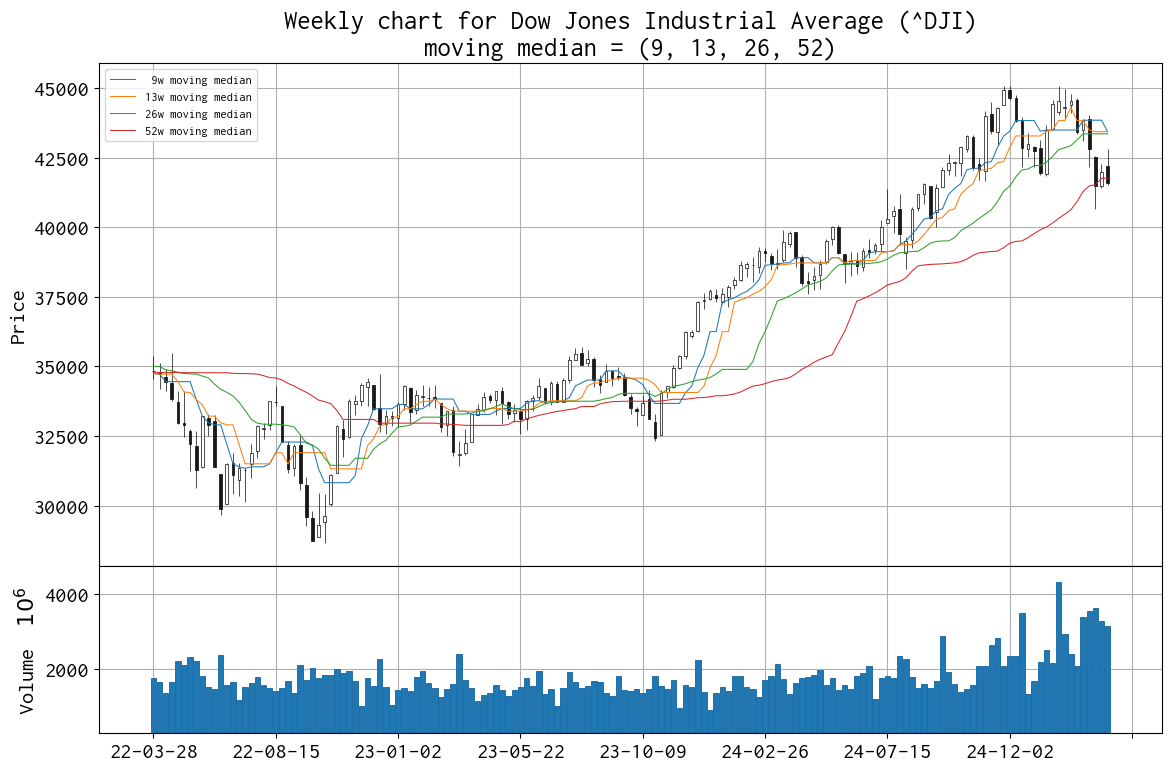

In [4]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

mm09 = df0['Close'].rolling(9).median()
mm13 = df0['Close'].rolling(13).median()
mm26 = df0['Close'].rolling(26).median()
mm52 = df0['Close'].rolling(52).median()

apds  = [
    mpf.make_addplot(mm09[df.index], width=0.75, label=' 9w moving median', ax=ax[0]),
    mpf.make_addplot(mm13[df.index], width=0.75, label='13w moving median', ax=ax[0]),
    mpf.make_addplot(mm26[df.index], width=0.75, label='26w moving median', ax=ax[0]),
    mpf.make_addplot(mm52[df.index], width=0.75, label='52w moving median', ax=ax[0]),
]   

mpf.plot(
    df, type='candle', style='default',
    volume=ax[1],
    datetime_format='%y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)
ax[0].set_title('Weekly chart for %s (%s)\nmoving median = (9, 13, 26, 52)' %(ticker.info['longName'], symbol))
ax[0].legend(loc='upper left', fontsize=9)

plt.tight_layout()
plt.savefig('report_weekly_chart_median_%s.png' % code)
plt.show()

In [5]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-17 00:00:00-04:00,41460.218750,42250.289062,41412.75,41985.351562,3283370000,0.0,0.0
2025-03-24 00:00:00-04:00,42180.140625,42821.828125,41530.00,41583.898438,3142953752,0.0,0.0


In [6]:
df.tail(2)['Close']

Date
2025-03-17 00:00:00-04:00    41985.351562
2025-03-24 00:00:00-04:00    41583.898438
Name: Close, dtype: float64

In [7]:
df.tail(2)['Close'].diff()

Date
2025-03-17 00:00:00-04:00           NaN
2025-03-24 00:00:00-04:00   -401.453125
Name: Close, dtype: float64

In [8]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-03-24 00:00:00-04:00   -596.242188
dtype: float64

In [9]:
df['Close'].rolling(9).median().tail()

Date
2025-02-24 00:00:00-05:00    43840.910156
2025-03-03 00:00:00-05:00    43840.910156
2025-03-10 00:00:00-04:00    43840.910156
2025-03-17 00:00:00-04:00    43840.910156
2025-03-24 00:00:00-04:00    43428.019531
Name: Close, dtype: float64

In [10]:
df['Close'].rolling(13).median().tail()

Date
2025-02-24 00:00:00-05:00    43828.058594
2025-03-03 00:00:00-05:00    43487.828125
2025-03-10 00:00:00-04:00    43428.019531
2025-03-17 00:00:00-04:00    43428.019531
2025-03-24 00:00:00-04:00    43428.019531
Name: Close, dtype: float64

In [11]:
df['Close'].rolling(26).median().tail()

Date
2025-02-24 00:00:00-05:00    43351.964844
2025-03-03 00:00:00-05:00    43351.964844
2025-03-10 00:00:00-04:00    43351.964844
2025-03-17 00:00:00-04:00    43351.964844
2025-03-24 00:00:00-04:00    43351.964844
Name: Close, dtype: float64

In [12]:
df['Close'].rolling(52).median().tail()

Date
2025-02-24 00:00:00-05:00    41284.429688
2025-03-03 00:00:00-05:00    41478.429688
2025-03-10 00:00:00-04:00    41525.634766
2025-03-17 00:00:00-04:00    41750.763672
2025-03-24 00:00:00-04:00    41761.173828
Name: Close, dtype: float64

## Robust Bollinger bands

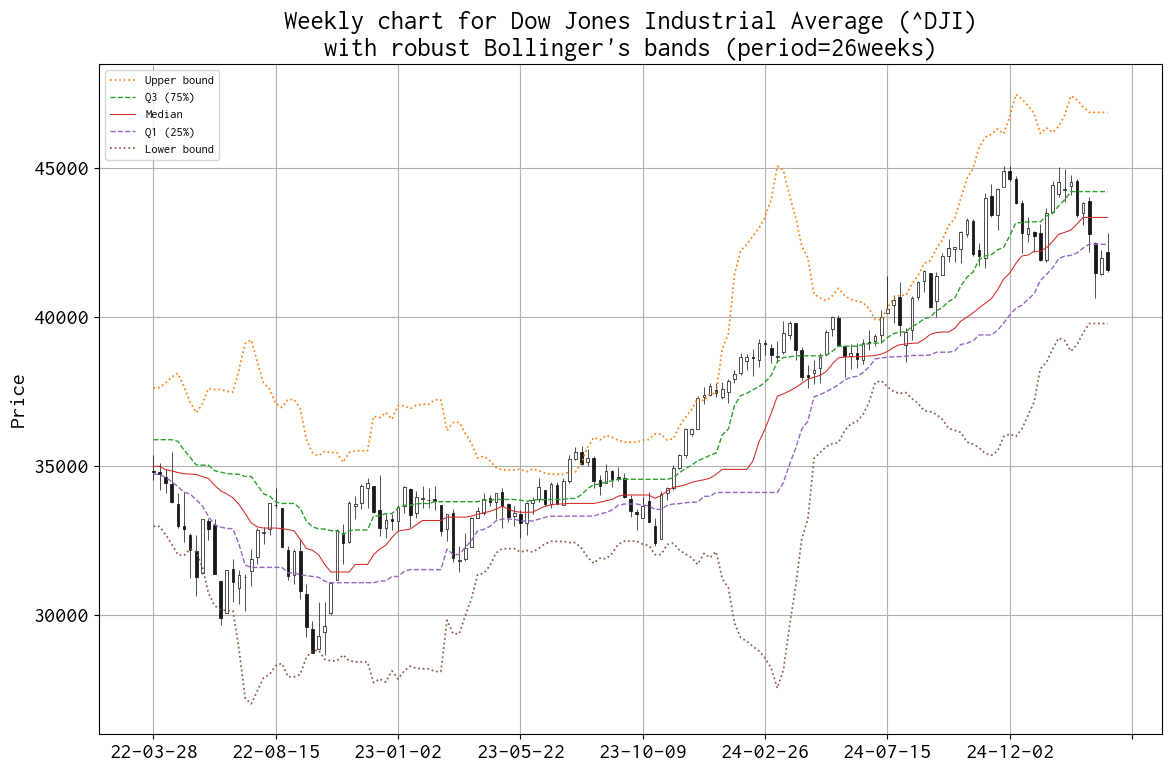

In [13]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))

# Bollinger bands
period = 26
mv_median = df0['Close'].rolling(period).median()
mv_q1 = df0['Close'].rolling(period).quantile(.25)
mv_q3 = df0['Close'].rolling(period).quantile(.75)
mv_iqr = mv_q3 - mv_q1
mv_lower = mv_q1 - mv_iqr * 1.5
mv_upper = mv_q3 + mv_iqr * 1.5

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax,
)

ax.grid()
ax.legend(loc='best', fontsize=9)

try:
    ax.set_title('Weekly chart for %s (%s)\nwith robust Bollinger\'s bands (period=%dweeks)' % (ticker.info['longName'], symbol, period))
except KeyError:
    ax.set_title('Weekly chart for %s\nwith robust Bollinger\'s bands (period=%sweeks)' % (symbol, period))

plt.tight_layout()
plt.savefig('report_weekly_chart_bollinger_robust_%s.png' % code)
plt.show()

## ヒストグラム

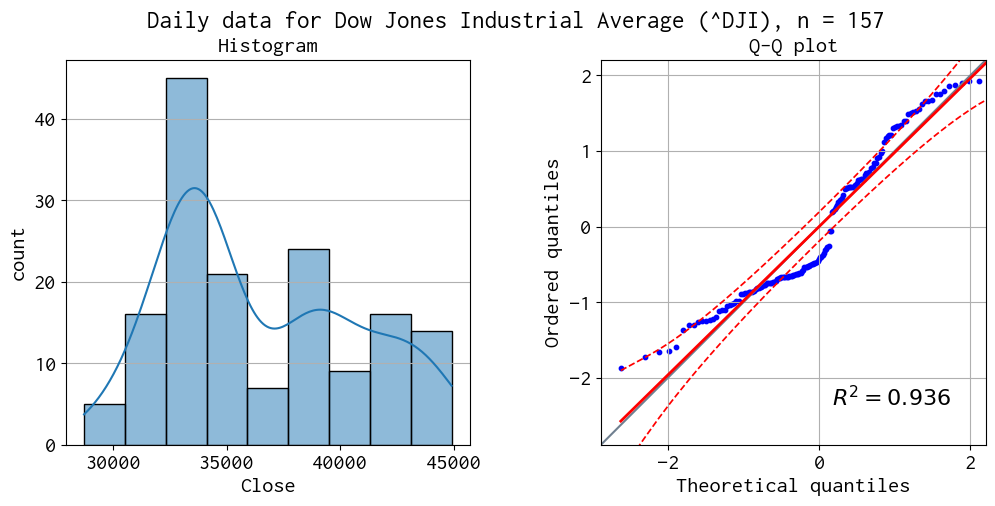

In [14]:
plt.rcParams['font.size'] = 16

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(
    df['Close'],
    kde=True,
    ax=axes[0]
)

# ヒストグラム
axes[0].set_xlabel("Close")
axes[0].set_ylabel("count")
axes[0].grid(axis = 'y')
axes[0].set_title('Histogram', fontsize=16)

# Q-Q プロット
pg.qqplot(df['Close'], s=10,  ax=axes[1])
axes[1].set_title('Q-Q plot', fontsize=16)
axes[1].grid()

plt.suptitle('Daily data for %s (%s), n = %d' % (ticker.info['longName'], symbol, len(df)), fontsize=18)
plt.subplots_adjust(wspace=0.3)
plt.savefig('report_daily_histogram_qqplot_%s.png' % code)
plt.show()